In [1]:
#  Practice Project 2
#  Mushroom Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


df=pd.read_csv('C:\ProgramData\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Shape of the dataset
df.shape


(8124, 23)

In [ ]:
# This shows that our dataset contains 8124 rows and 23 columns - the specifications like cap-shape, cap-surface, cap-color, bruises, odor, gill-size, etc.

In [4]:
# checking for null values in dataset

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# no null values could be found in dataset

In [6]:
# counting of values of edible and poisonous mushrooms in class

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
# There are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

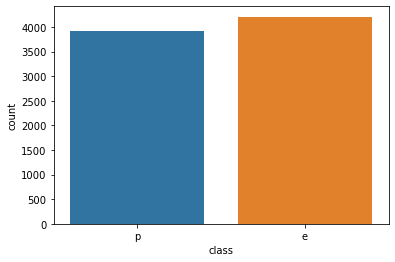

In [5]:
#plotting of edible and poisonous mushrooms

%matplotlib inline

sns.countplot(df['class'])

In [ ]:
# Clearly the above plot shows that the dataset is balanced

In [4]:
# Exploratory Data Analsysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Above data shows that there 8124 rows and 23 columns ,all being of object datatype.All the values are not null in the dataset

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [2]:
# Exploratory Data Analsysis

# The data is categorical so we will use LabelEncoder to convert it to ordinal.

le=LabelEncoder()

df=df.apply(le.fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# all the column values are converted to ordinal and there are no categorical values left now

In [3]:
# the column “veil-type” is 0 and not contributing to the data so we will remove it.

df = df.drop(["veil-type"],axis=1)

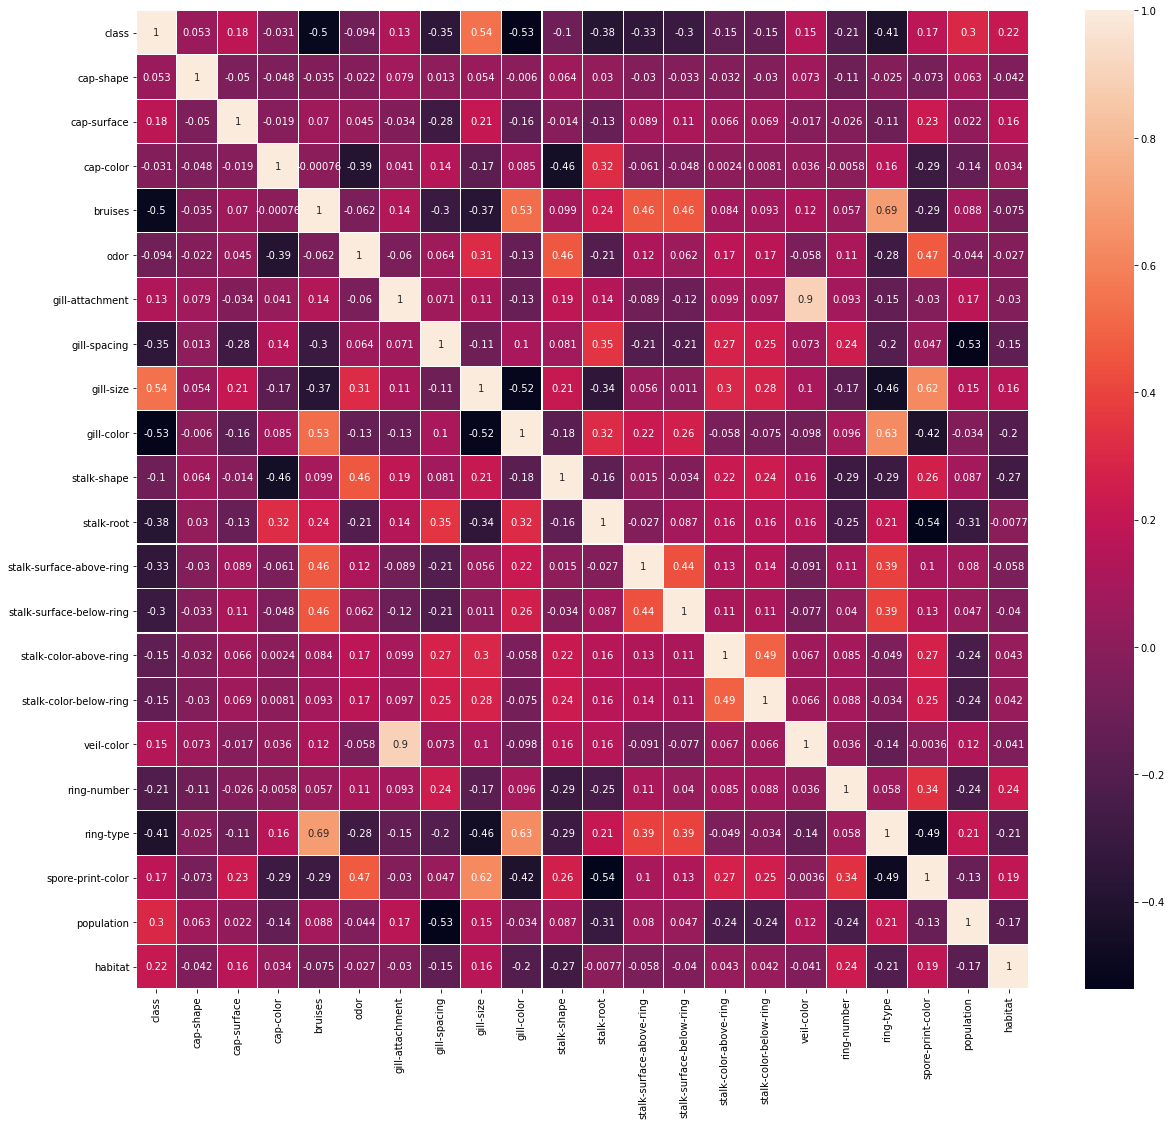

In [18]:
# checking correlation between the variables 

plt.figure(figsize=(20,18))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=0.1)
plt.show()

#corr_matrix['class'].sort_values(ascending = False)

In [20]:
# the least correlating variable is the most important one for classification. In this case, “gill-color” is -0.53 

corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

In [4]:
# Analysing gill-color variable :

df[['gill-color','class']].groupby(['gill-color'],as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


In [5]:
x=df.drop(['class'],axis=1)
y=df['class']

In [8]:

# Training the model using Logistic Regression AND Evaluating the model

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =i)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred_lr)
    if acc>score_s:
        score_s=acc
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  12
best accuracy score :  0.9552912223133716


In [14]:
# Finding best accuracy score using best random state

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =12)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc=accuracy_score(y_test,y_pred_lr)
acc

0.9552912223133716

In [15]:
# classification_report for logistic regression

print("Logistic Regression Classification report: \n\n",classification_report(y_test,y_pred_lr))

Logistic Regression Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1245
           1       0.96      0.95      0.95      1193

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [ ]:
# Logistic Regression is also generating good accuracy_score and Classification report

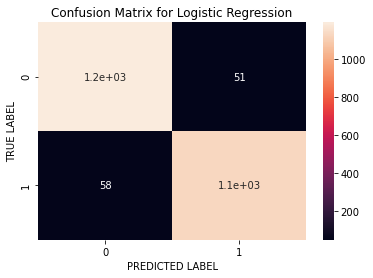

In [19]:
# Confusion Matrix for Logistic Regression

cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [21]:
# Training the model using RandomForestClassifier and evaluation of model

from sklearn.ensemble import RandomForestClassifier

rfl=RandomForestClassifier(max_depth=5)

score_rfl=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =i)
    rfl.fit(X_train,y_train)
    y_predicted_rfl=lr.predict(X_test)
    acc=accuracy_score(y_test,y_predicted_rfl)
    if acc>score_rfl:
        score_rfl=acc
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_rfl)




best random_state :  12
best accuracy score :  0.9552912223133716


In [22]:
# classification_report for RandomForestClassifier

print("RandomForestClassifier Classification report: \n\n",classification_report(y_test,y_predicted_rfl))

RandomForestClassifier Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1251
           1       0.95      0.95      0.95      1187

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [ ]:
# RandomForestClassifier is also generating good accuracy_score and Classification report

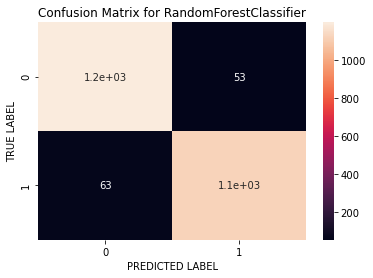

In [23]:
# Confusion Matrix for RandomForestClassifier

cm=confusion_matrix(y_test,y_predicted_rfl)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [25]:
# Training the model using KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: ",(best_Kvalue))
print("Test Accuracy Score: ",(best_score*100))

Best KNN Value:  1
Test Accuracy Score:  100.0


In [27]:
# accuracy score for KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predicted_knn=knn.predict(X_test)
        
accuracy_score(y_test,y_predicted_knn)


0.9995898277276456

In [28]:
# classification_report for KNeighborsClassifier

print("KNeighborsClassifier Classification report: \n\n",classification_report(y_test,y_predicted_knn))

KNeighborsClassifier Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



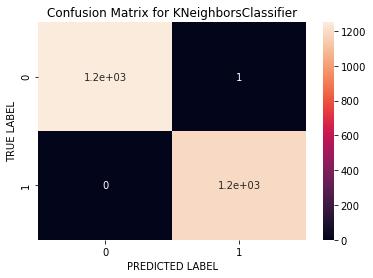

In [29]:
# Confusion Matrix for KNeighborsClassifier

cm=confusion_matrix(y_test,y_predicted_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

In [ ]:
#NOTE:Out of LogisticRegression,KNeighboursClassifier and RandomForestClassifier, KNeighborsClassifier has 
#highest accuracy_score,classification_report and best confusion_matrix.Hence it is the best model out of all.

In [32]:
#Use Hyper parameter tuning using GridSearchCV for KNeighborsClassifier:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV:

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_range = list(range(1, 31))
param_grid = dict(n_neighbors=knn_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#GCV.fit(x_train,y_train)
grid.best_params_  # Printing the best parameter found by GridSearchCV


Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 1}

In [33]:
GCV_pred=grid.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy


0.9995898277276456

In [ ]:
# Clearly KNeighborsClassifier is producing the best accuracy_score 

In [37]:
# Checking Accuracy on Test Data

knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred_knn)*100

print("Accuracy of testing dataset is : ",test_accuracy)

Accuracy of testing dataset is :  98.56439704675964


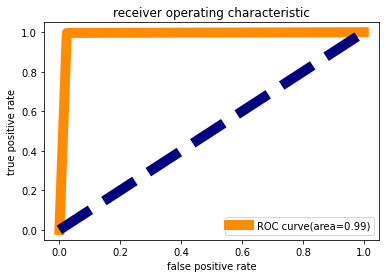

In [38]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_knn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [36]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2433,0,0
2434,0,0
2435,0,0
2436,1,1


In [ ]:
# Exporting the model through pickle

import pickle
filename='mushroom_practice.pkl'
pickle.dump(knn,open(filename,'wb'))

Text(0.5, 1.0, 'Region Vs HAPPINESS SCORE')

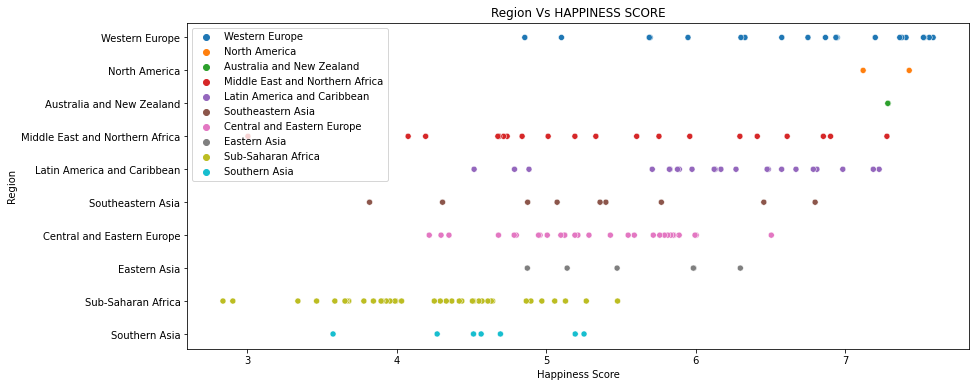

Text(0.5, 1.0, 'REGION Vs Health (Life Expectancy)')

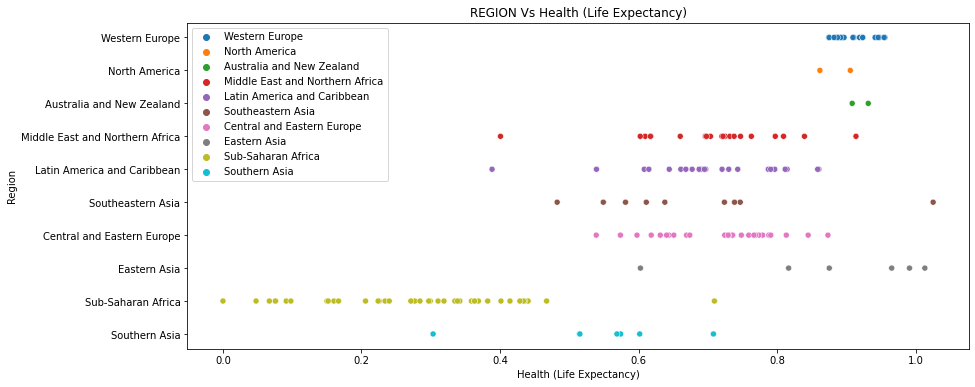

<BarContainer object of 158 artists>

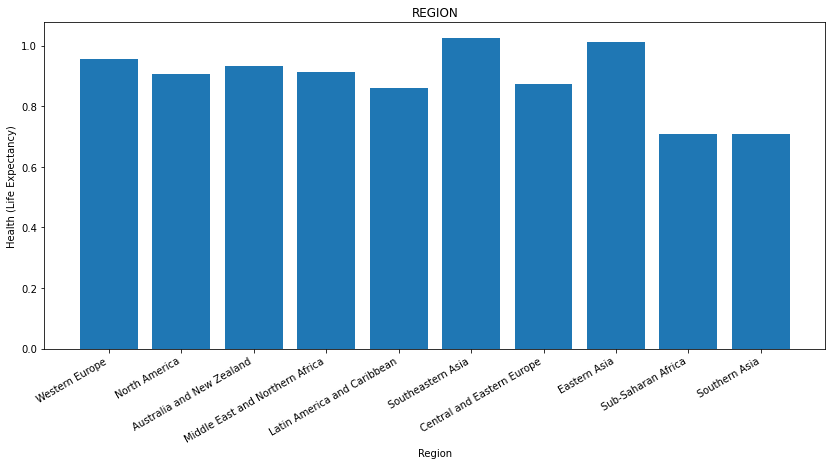

<BarContainer object of 10 artists>

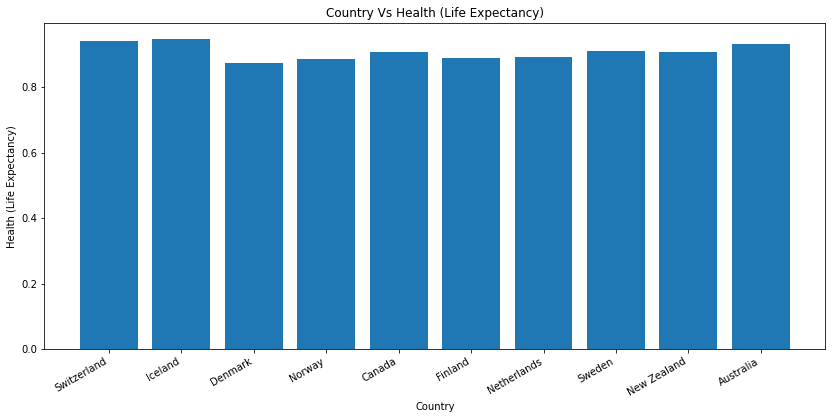